## **STREET VIEW FIBRE POLE DETECTION**

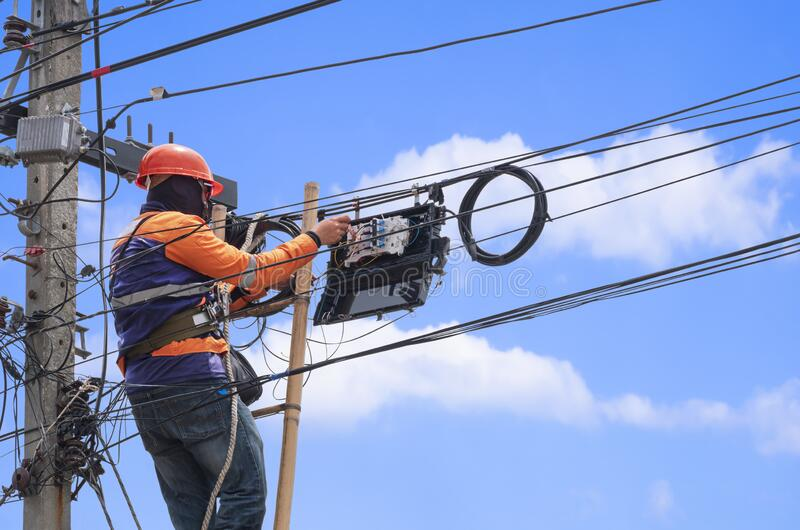

### **TABLE OF CONTENT**

> 1.0 OVERVIEW<BR>
>> 1.1 Project Description<br>
1.2 Project Deliverables 

>2.0 YOLO V7 SETUP <br>
>> 2.1 YOLO V7<br> 
2.2 YV7 Setup

>3.0 LOAD DATASET<br>
 4.0 MODELLING
>>4.1 MODEL TRAINING  <br> 4.2 MODEL EVALUATION<br>4.3 MODEL TESTING<br>4.4 MODEL DEPLOYMENT

>5.0 Conclusion 









## **1.0 OVERVIEW**
Since this idea was originally started by a team of interns in the July 2022 cohort, there is no link back to a parent idea from the
Project Idea List. In the first iteration of the project, the team focused primarily on trying to get an end-to-end training procedure in place to
detect street poles using images gathered from Google searches & testing whether classification or object detection makes
sense and evaluating different architectures.<br>

### **1.1 Project Description**<br>
The overall goal (bigger picture) is to define a system where:
>* A user selects a region of interest or some ID that corresponds to a polygon
*A script samples a random set of points on each road in the polygon and gets a street view image
* Inference is run on all images
* Report some statistics, e.g. 23% of sampled images contained a fibre pole with a map showing which points included a pole
and which didn't. If you click the point, it shows the image with the inference result.
<br><br>

**Challenges**
> * Street poles and street views in general will different from country to country, and town to town. For the proof of concept we
can focus on a particular study area, but the solution should consider how easy it is to collect a more diverse set of images
and scenes.
* In Street View, a user can orient the camera in many different directions. We need to ensure that the dataset is robust to
changes in camera orientation by either having a diverse set of images of the same object taken from many angles or
having a principled sampling approach that always samples images from the same set of orientations.
<br><br>

**1.2 Deliverables**<br>
Take what the first team put together and work on extending and improving it with a specific focus on:
> 1. Developing a robust training and testing dataset
2. Settling on a model architecture
3. Improving model accuracy
4. Implementing the spatial sampling and summary stats aggregation
5. A 2 page white paper on the work completed
6. Recommended next steps for the project
<br><br>

Click [here](https://) for Project Document


##**2.0 INSTALL & IMPORT**

> In this section, we will install the modules/libraries/packages needed for the success of training YV7. We will install the following libraries as they are not already installed by google colab;
>>
* -r requirements.txt

> The use of the aforementioned will be explained as the notebook progresses. 

###**2.1 Installation Proper**

#####**2.1.1 YOLO V7 SETUP and -r requirements.txt installation**

In [ ]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7 #YOLO V7 Setup 
%cd yolov7 #remoting into yolov7 path
!pip install -r /content/yolov7/requirements.txt #installing our first package

In [ ]:
 #Install model dependencies
!pip install requests==2.23.0 #install request

##**2.2 IMPORT**
> In this section, we will *import* the neccessary packages needed for our Fibre pole detection.

In [ ]:
#from roboflow import Roboflow
import matplotlib.pyplot as plt
import glob
from IPython.display import Image, display
from pathlib import Path
import torch


##**2.0 YOLO V7 SETUP**




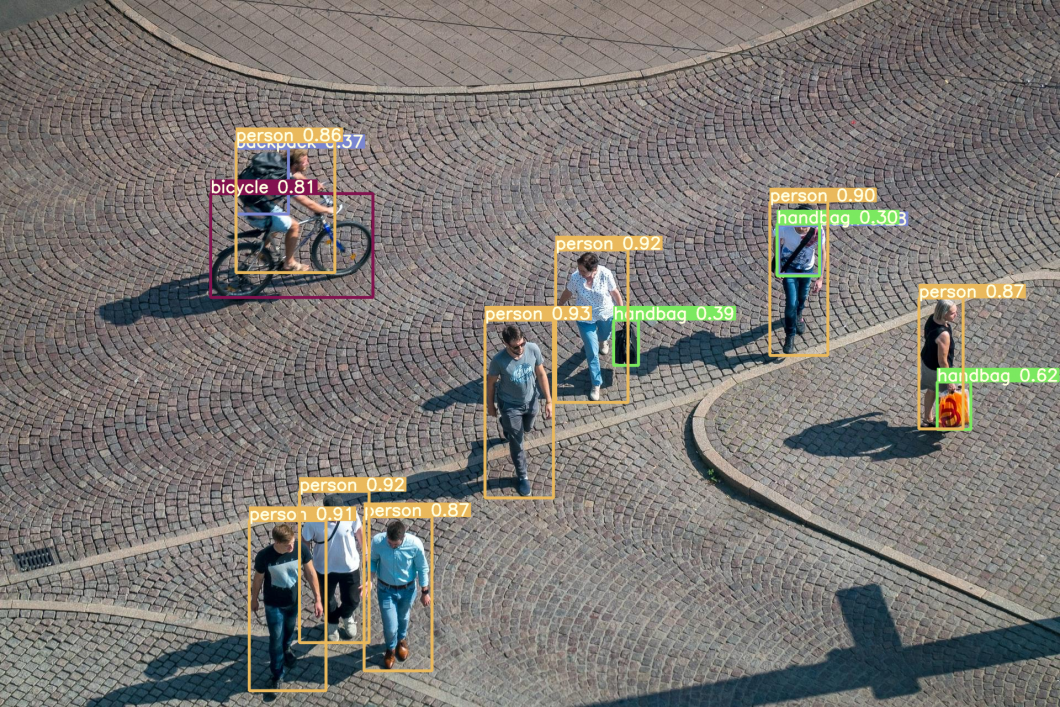

###**2.1 YOLO V7**

The YOLOv7 algorithm is making big waves in the computer vision and machine learning communities. The newest YOLO algorithm surpasses all previous object detection models and YOLO versions in both speed and accuracy. It requires several times cheaper hardware than other neural networks and can be trained much faster on small datasets without any pre-trained weights. Hence, YOLOv7 is expected to become the industry standard for object detection in the near future, surpassing the previous state-of-the-art for real-time applications – YOLO v4. Our Background: At viso.ai, we provide the most advanced enterprise computer vision deployment platform Viso Suite. The no-code software infrastructure is used by leading organizations to train YOLOv7 models and build computer vision applications
Read more at: https://viso.ai/deep-learning/yolov7-guide/

###**2.2 YV7 SETUP**

Now we have installed all we need to train our YOLO V7 model.

##**3.0 LOAD DATASET**

Download the dataset from roboflow using the `YOLOv7 PyTorch` export.<br>
Roboflow is a Computer Vision developer framework for better data collection to preprocessing, and model training techniques. Roboflow has public datasets readily available to users and has access for users to upload their own custom data also. Roboflow accepts various annotation formats. In data pre-processing, there are steps involved such as image orientations, resizing, contrasting, and data augmentations. 

The entire workflow can be co-ordinated with teams within the framework. For model training, there’s a bunch of model libraries already present such as EfficientNet, MobileNet, Yolo, TensorFlow, PyTorch, etc. Thereafter model deployment and visualization options are also available hence encompassing the entire state-of-art. 


In [ ]:
#Import roboflow library
#download dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="insert your api key")
project = rf.workspace("insert workpace name").project("insert project name")
dataset = project.version('insert yout dataset version').download("yolov7")


##**4.0 MODELLING**
After loading the custom dataset, then dowload the YV7 folder into our drive for training and deployment purposes

In [ ]:
# download COCO starting checkpoint
%cd /content/yolov7
!wget "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt"

###**4.1 MODEL TRAINING**

In [ ]:
# run this cell to begin training
%cd /content/yolov7
!python train.py --batch 16 --cfg cfg/training/yolov7.yaml --epochs 500 --data {dataset.location}/data.yaml --weights "yolov7.pt" --device 0 


In [ ]:
# optional, zip to download weights and results locally

!zip -r export.zip . -i runs/train
!zip -r export.zip /content/yolov7/runs/train/exp/weights/best.pt
!zip export.zip runs/train/exp/*

In [ ]:
# export ONNX for ONNX inference
%cd /content/yolov7/
!python export.py --weights ./runs/train/exp/weights/best.pt \
        --grid --end2end --simplify \
        --topk-all 100 --iou-thres 0.65 --conf-thres 0.35 \
        --img-size 640 640 --max-wh 640 # For onnxruntime, you need to specify this value as an integer, when it is 0 it means agnostic NMS, 
                     # otherwise it is non-agnostic NMS

###**4.2 MODEL EVALUATION**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Run evaluation
%cd /content/yolov7
!python detect.py --weights /content/drive/MyDrive/content/yolov7/runs/train/exp/weights/best.pt --conf 0.5 --source /content/yolov7/yolo-obj-detection-2/test/images


/content/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/yolov7/yolo-obj-detection-2/test/images', update=False, view_img=False, weights=['/content/drive/MyDrive/content/yolov7/runs/train/exp/weights/best.pt'])
YOLOR 🚀 v0.1-113-g8035ee6 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Conve

###**4.3 MODEL TESTING**

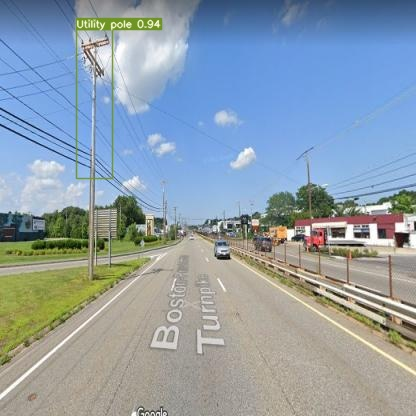

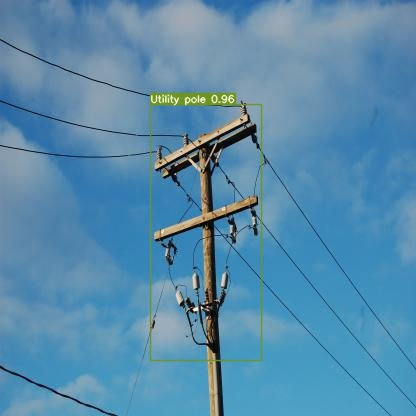

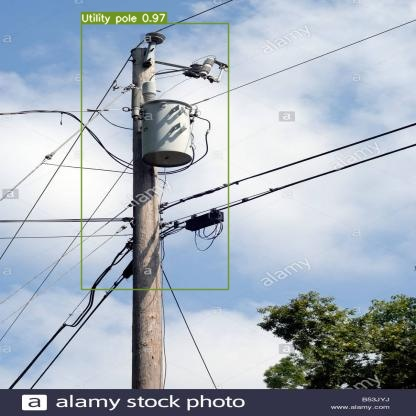

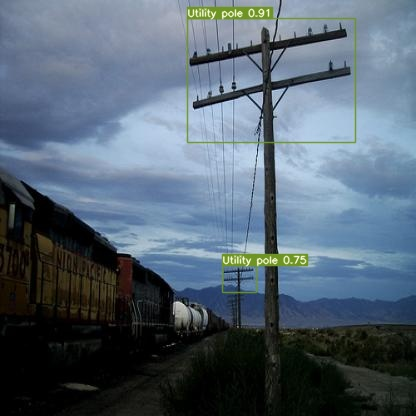

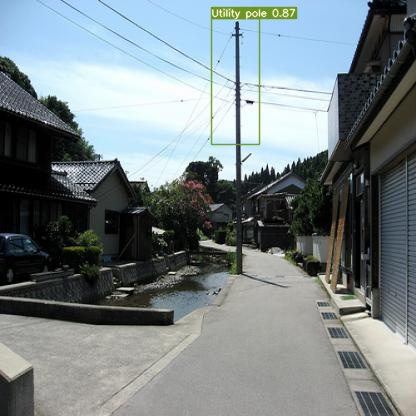

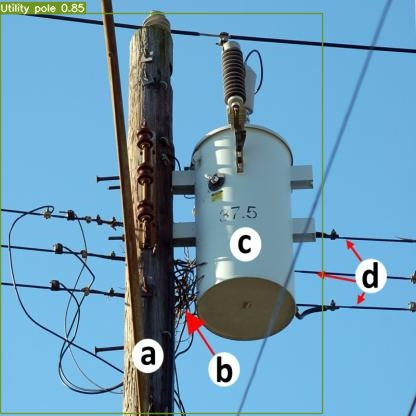

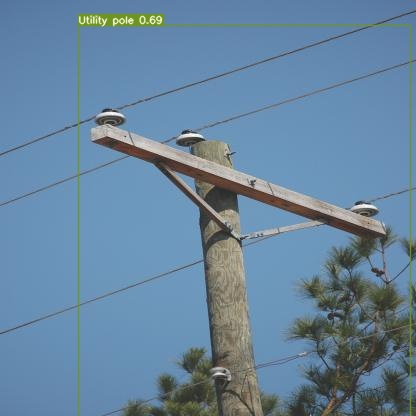

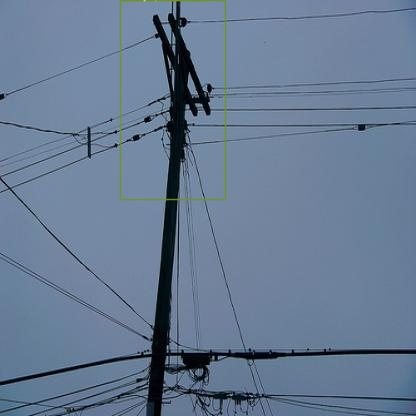

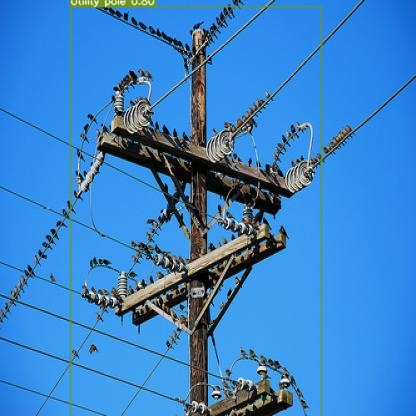

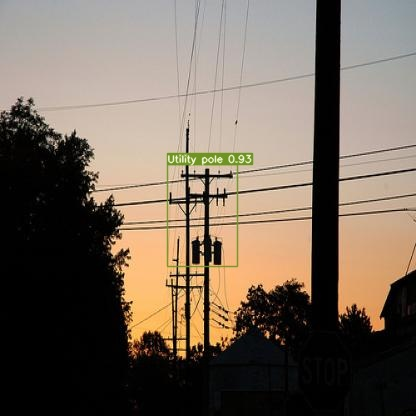

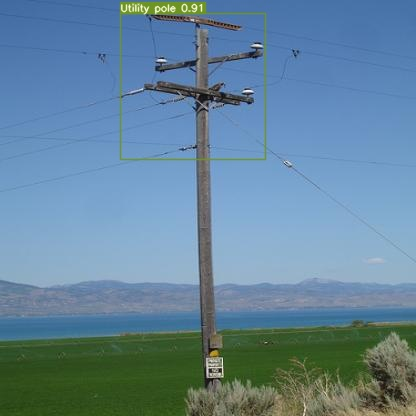

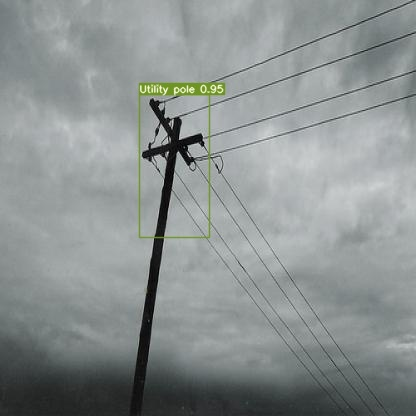

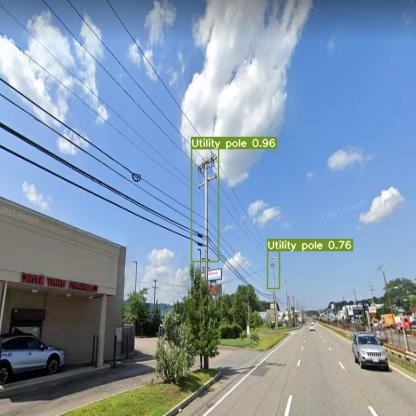

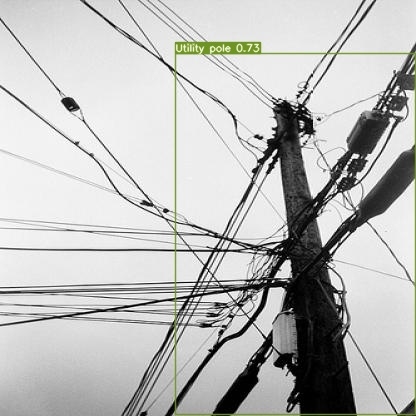

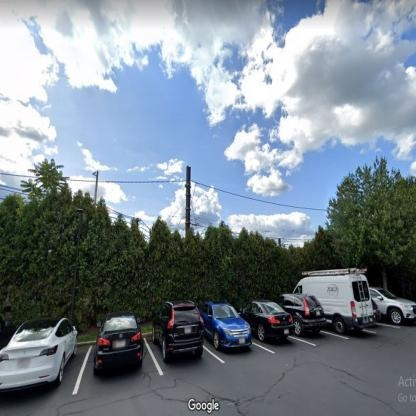

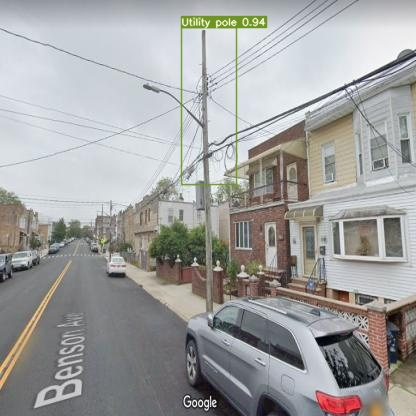

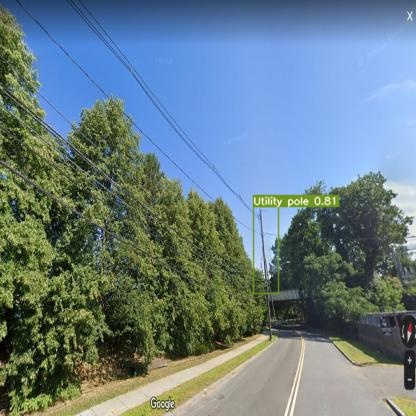

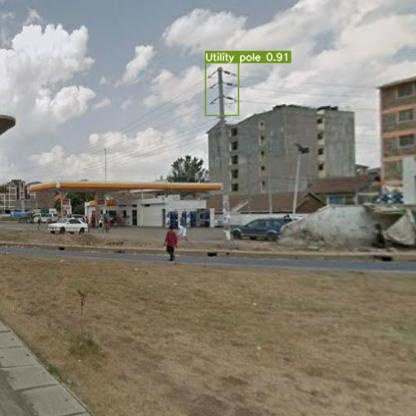

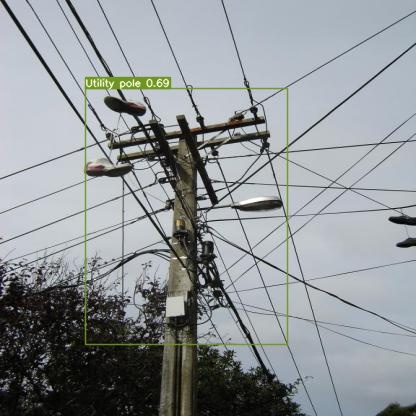

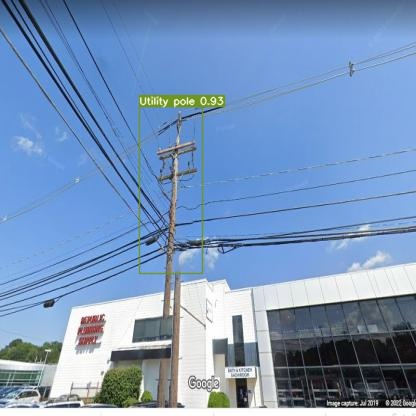

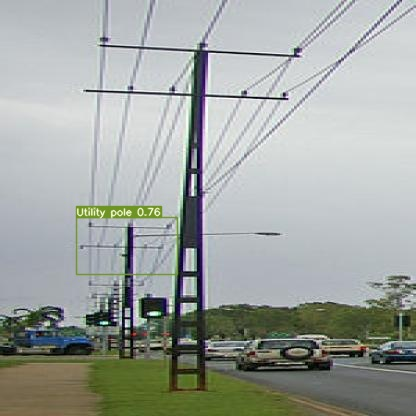

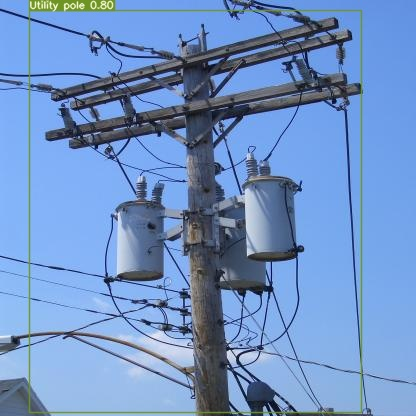

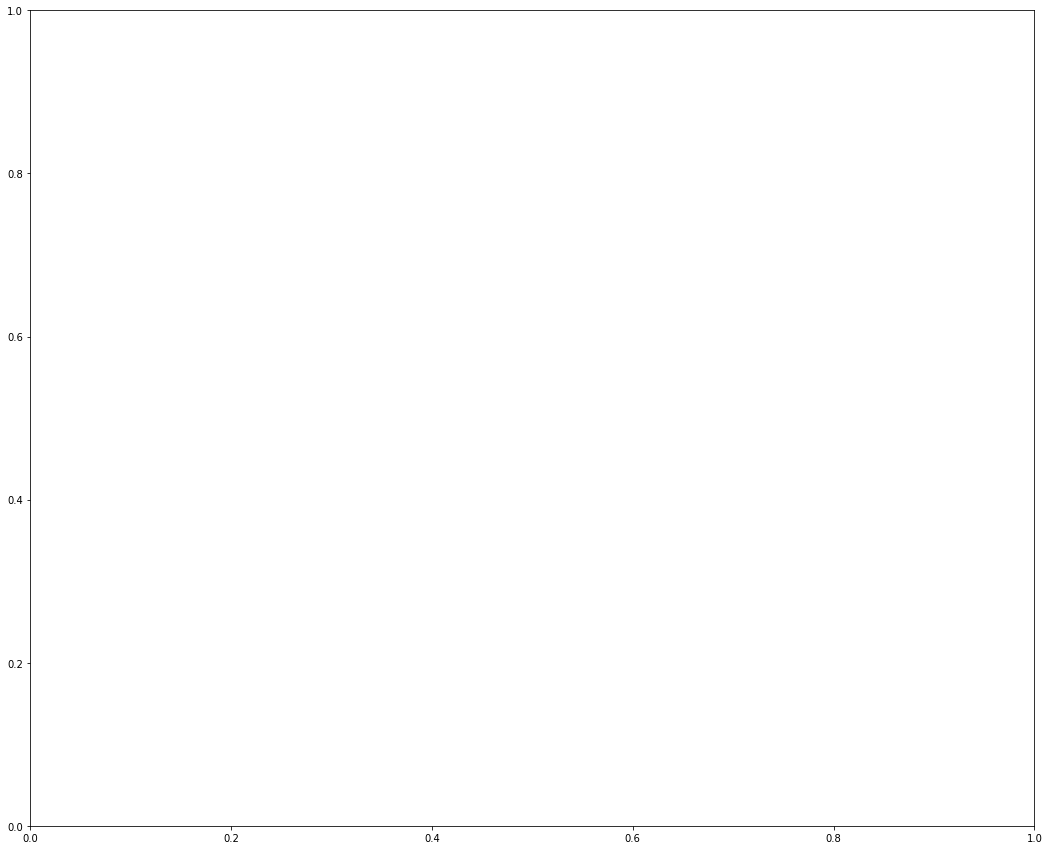

In [ ]:
#display inference on ALL test images
fig, ax = plt.subplots(figsize=(18, 15))
i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/yolov7/runs/detect/exp/*.jpg'): 
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1
    
    

###**4.4 MODEL DEPLOYMENT** 

To deploy, you'll need to export your weights and save them to use later.

In [ ]:
%cd /content/yolov7
"""PyTorch Hub models
Usage:
    import torch
    model = torch.hub.load('repo', 'model')
"""
from pathlib import Path

import torch

from models.yolo import Model
from utils.general import check_requirements, set_logging
#from utils.google_utils import attempt_download
from utils.torch_utils import select_device
dependencies = ['torch', 'yaml']
#check_requirements(Path(__file__).parent / 'requirements.txt', exclude=('pycocotools', 'thop'))
set_logging()


def custom(path_or_model='path/to/model.pt', autoshape=True):
    """custom mode
    Arguments (3 options):
        path_or_model (str): 'path/to/model.pt'
        path_or_model (dict): torch.load('path/to/model.pt')
        path_or_model (nn.Module): torch.load('path/to/model.pt')['model']
    Returns:
        pytorch model
    """
    model = torch.load(path_or_model, map_location=torch.device('cpu')) if isinstance(path_or_model, str) else path_or_model  # load checkpoint
    if isinstance(model, dict):
        model = model['ema' if model.get('ema') else 'model']  # load model

    hub_model = Model(model.yaml).to(next(model.parameters()).device)  # create
    hub_model.load_state_dict(model.float().state_dict())  # load state_dict
    hub_model.names = model.names  # class names
    if autoshape:
        hub_model = hub_model.autoshape()  # for file/URI/PIL/cv2/np inputs and NMS
    device = select_device('0' if torch.cuda.is_available() else 'cpu')  # default to GPU if available
    return hub_model.to(device)



#load model
model = custom(path_or_model='/content/drive/MyDrive/content/yolov7/runs/train/exp/weights/best.pt')  # custom example



# Verify inference
#imgs = cv2.imread('/content/WhatsApp Image 2022-09-28 at 11.28.04 PM.jpeg')

#results = model(imgs)  # batched inference
#results.print()
#results.pandas().xyxy[0]

/content/yolov7


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Adding autoShape... 


In [ ]:
import cv2

def predictions(images_path):
  
  """
    Accept the location of all images and return a list of locations that have poles
    args:
        images_path: location path to images

    output:
        locations_with_utility_poles: list of locations from which poles have been detected
  """
  total_images=0 #initialize to count number of images in a selected folder
  images_with_ups=0 #initialize to count number of images with utility poles in the selected folder
  locations_with_utility_poles=[] #assumes image names are in the form lat_lng.jpg
  
  for image in glob.glob(images_path):
    total_images+=1
    img = cv2.imread(image)
    preds=model(img).pandas().xyxy[0]

    #filter images with utility poles
    if not preds.empty and preds['name'][0]=='Utility pole':
      images_with_ups+=1
      locations_with_utility_poles.append(','.join(image.split('/')[-1][:-4].split('_')))

  print(f'{images_with_ups} out of {total_images} have utility poles')
  print('\n\nThese are the coordinates with utility poles\n')
  return locations_with_utility_poles

In [ ]:
!pip install osmnx
!pip install matplotlib==3.1.3
!pip install shapely

In [ ]:
#Generate location coordinates and download street view images
import numpy as np
import osmnx as ox
from shapely import wkt
import matplotlib.pyplot as plt
import glob
import requests
from geopy.geocoders import Nominatim
import os
from google.colab.patches import cv2_imshow


def sample_points(G, n):
    gdf_edges = ox.graph_to_gdfs(G, nodes=False)[['geometry', 'length']]
    weights = gdf_edges['length'] / gdf_edges['length'].sum()
    idx = np.random.choice(gdf_edges.index, size=n, p=weights)
    lines = gdf_edges.loc[idx, 'geometry']
    return lines.interpolate(lines.length * np.random.rand())

def get_coords(address, buffer=500):

  gdf = ox.geocode_to_gdf(address, buffer_dist=buffer, which_result=1)
  polygon=gdf.geometry[0]
  if polygon.type=='Polygon':

    G = ox.project_graph(ox.graph_from_polygon(polygon, network_type='drive'))
    points = sample_points(G, 100)
    fig, ax = ox.plot_graph(G, show=False, close=False )
    points.plot(ax=ax)
    plt.show()
    plt.savefig('/content/polygon.png')
    coords=[]

    for x,y in polygon.exterior.coords:
      coords.append(f'{y},{x}')

  return coords

def ups_download(address, api_key, buffer=500):
    """accept a list of addresses, download google street view images, save the images, and return image paths

        args:
            locations: list of cordinates or location addresses
            api_key: your google static street view api key

    """
  
    coords =get_coords(address, buffer)
    base_url = 'https://maps.googleapis.com/maps/api/streetview?'
    # i=0
    for location in coords:
      pic_params = {'key': api_key, 'location': location, 'heading': 90, 'pitch': -0.76, 'fov': 120,
                      'size': "640x640"}
      name=location.replace(',','_')  
      pic_response = requests.get(base_url, params=pic_params)

      #download path....create path if it don't exist
      path='/content/downs2'
      if not os.path.exists(path):
        os.makedirs(path)
      with open(f'{path}/{name}.jpg', 'wb') as file:
          file.write(pic_response.content)
          pic_response.close()
    print('Area polygon')
    img = cv2.imread("/content/polygon.png", cv2.IMREAD_ANYCOLOR)
    cv2_imshow(img)

Area polygon


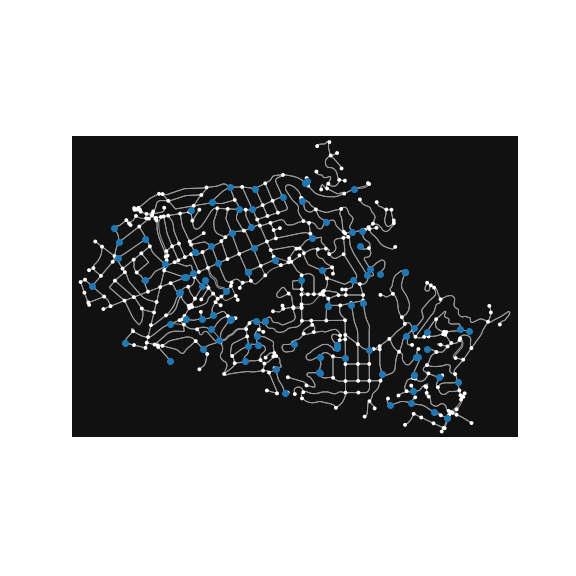

In [ ]:
api_key='insert your google street view api'
address='56 Apata street somolu' #insert street address of your choice
buffer=300 #set your buffer zone or simply use the default 500 metres

ups_download(address, api_key,buffer)

In [ ]:
#test images path
#image_path='/content/yolov7/yolo-obj-detection-2/test/images/*.jpg'
#predictions(image_path)

In [ ]:
#download image path
downloads_path='/content/downs1/*.jpg'
predictions(downloads_path)

55 out of 81 have utility poles


These are the coordinates with utility poles



['-1.600886,37.167066',
 '-1.507870,37.093906',
 '-1.413817,36.950411',
 '-1.527872,37.125760',
 '-1.539787,37.137401',
 '-1.545182,37.141575',
 '-1.570289,37.152175',
 '-1.475415,37.034726',
 '-1.515356,37.105654',
 '-1.607235,37.170156',
 '-1.608265,37.170650',
 '-1.620512,37.176594',
 '-1.618228,37.175467',
 '-1.480906,37.044843',
 '-1.427848,36.960365',
 '-1.487170,37.053148',
 '-1.446006,36.995920',
 '-1.457568,37.005297',
 '-1.630261,37.181368',
 '-1.480145,37.043449',
 '-1.554298,37.145641',
 '-1.522102,37.116115',
 '-1.436246,36.973733',
 '-1.583995,37.158848',
 '-1.426089,36.958669',
 '-1.624684,37.178621',
 '-1.633285,37.182827',
 '-1.613338,37.173096',
 '-1.589969,37.161723',
 '-1.488371,37.054467',
 '-1.469184,37.023321',
 '-1.421261,36.954510',
 '-1.576842,37.155329',
 '-1.616212,37.174523',
 '-1.611633,37.172270',
 '-1.558985,37.147518',
 '-1.604211,37.168676',
 '-1.595127,37.164170',
 '-1.525673,37.121619',
 '-1.599310,37.166154',
 '-1.565377,37.150125',
 '-1.612523,37.1

In [ ]:
downloads_path='/content/downs2/*.jpg'
predictions(downloads_path)

308 out of 749 have utility poles


These are the coordinates with utility poles



['37.815541604813404,-122.23682935468882',
 '37.819596638647695,-122.25314633352643',
 '37.816455306981744,-122.24163776272393',
 '37.80931761673762,-122.22218747644513',
 '37.824010318601076,-122.25160030481024',
 '37.8123022255991,-122.22326535550226',
 '37.83239306918378,-122.24819969198226',
 '37.81018022737623,-122.22618061857068',
 '37.81041150331212,-122.22698229712134',
 '37.817031790841426,-122.24402582882763',
 '37.81267150504839,-122.23650423590843',
 '37.81569666665954,-122.23826123857556',
 '37.80841238550831,-122.21821558099087',
 '37.80918149226706,-122.22164908541556',
 '37.81453313320713,-122.23308666241654',
 '37.82691521314805,-122.25333045389817',
 '37.8126990573647,-122.23660626373808',
 '37.81672943605048,-122.24283367104873',
 '37.813579823279554,-122.22855821736893',
 '37.811061785234635,-122.21727174794609',
 '37.833063042415496,-122.22435207577408',
 '37.83119720849187,-122.24912845330014',
 '37.81810440201975,-122.24682936580176',
 '37.814437655965044,-122.24